In [2]:
import pandas as pd
data=pd.read_csv("C:/Users/MYCOM/data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()
# NULL 값 없음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## BMI

In [7]:
data['bmi'].max()

53.13

In [19]:
data['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

(array([  3.,  21.,  40.,  72., 109., 139., 174., 164., 154., 146., 112.,
         78.,  58.,  34.,  14.,  11.,   5.,   2.]),
 array([15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47,
        49, 51]),
 <BarContainer object of 18 artists>)

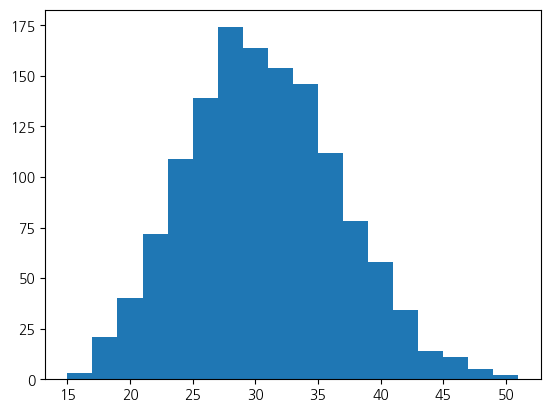

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(data['bmi'],bins=range(15,53,2))
# 정규분포에 가까움
# outlier 제외시키기

{'whiskers': [<matplotlib.lines.Line2D at 0x225267fafa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2252680a580>,
 'boxes': [<matplotlib.lines.Line2D at 0x225267facd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2252680ab20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2252680adf0>],
 'means': []}

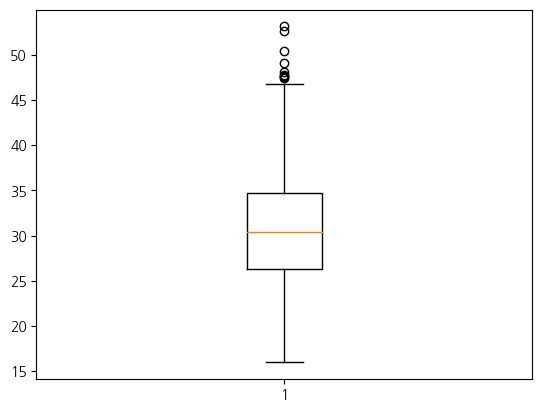

In [33]:
plt.boxplot(data['bmi'])

In [48]:
# 이상치 제거하기
IQR=data.bmi.quantile(0.75)-data.bmi.quantile(0.25)
data[data['bmi']>data.bmi.quantile(0.75)+1.5*IQR]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [49]:
data=data[data['bmi']<=data.bmi.quantile(0.75)+1.5*IQR]

In [50]:
# 확인하기
data[data['bmi']>data.bmi.quantile(0.75)+1.5*IQR]

,age,sex,bmi,children,smoker,region,charges


In [74]:
data['bmi'].describe()

count    1329.000000
mean       30.537348
std         5.919946
min        15.960000
25%        26.220000
50%        30.300000
75%        34.485000
max        46.750000
Name: bmi, dtype: float64

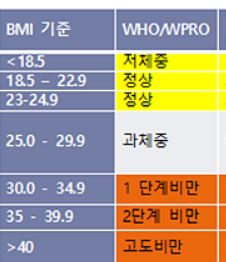

In [ ]:
# BMI 기준으로 새로운 column 만들기

In [78]:
data[(data['bmi']>=25)&(data['bmi']<29.9)].count()

age         374
sex         374
bmi         374
children    374
smoker      374
region      374
charges     374
dtype: int64

In [86]:
# WHO 기준에 맞게 BMI 추가하기
if 'bmi std' not in data.columns:
    data['bmi std'] = 0

In [87]:
data.loc[data['bmi']<18.5,'bmi std']=1.0
data.loc[(data['bmi']>=18.5)&(data['bmi']<24.9),'bmi std']=2.0
data.loc[(data['bmi']>=25)&(data['bmi']<29.9),'bmi std']=3.0
data.loc[(data['bmi']>=30)&(data['bmi']<34.9),'bmi std']=4.0
data.loc[(data['bmi']>=35)&(data['bmi']<39.9),'bmi std']=5.0
data.loc[data['bmi']>40,'bmi std']=6.0

In [89]:
# 확인하기 -> int로 값이 삽입됨
data.head(5)

,age,sex,bmi,children,smoker,region,charges,bmi std
0,19,female,27.900,0,yes,southwest,16884.92400,3
1,18,male,33.770,1,no,southeast,1725.55230,4
2,28,male,33.000,3,no,southeast,4449.46200,4
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,3


## Age

In [27]:
data['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

(array([137.,  57.,  56.,  56.,  56.,  55.,  54.,  52.,  51.,  50.,  50.,
         54.,  54.,  56.,  58.,  57.,  58.,  57.,  54.,  52.,  50.,  69.]),
 array([18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50,
        52, 54, 56, 58, 60, 62]),
 <BarContainer object of 22 artists>)

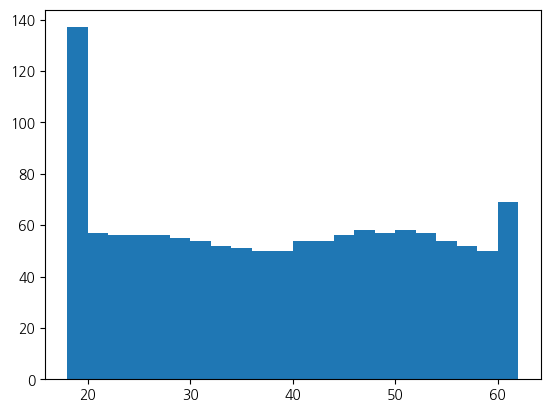

In [32]:
plt.hist(data['age'],bins=range(18,64,2))

In [98]:
# 데이터 왜도가 큰 것처럼 보임
data.age.skew()
# 하지만 실제로 skew값이 -2와 2사이에 있기 때문에 크지 않다고 봐도 무방
# 나이대별로 묶는건 어떤지?

0.058413301736796895

## Smoker, Sex, Region, Children

Text(0.5, 1.0, 'Children')

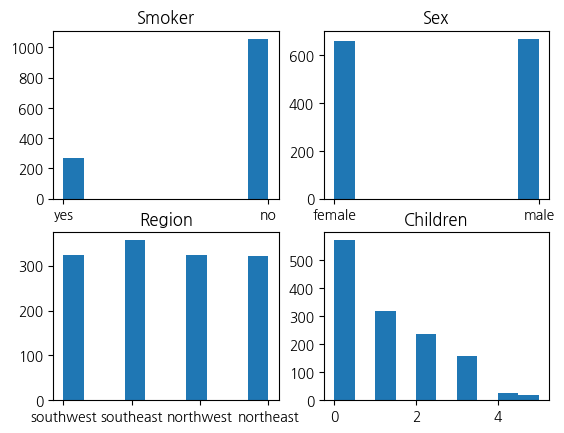

In [106]:
fig,ax=plt.subplots(2,2)

ax[0,0].hist(data['smoker'])
ax[0,0].set_title('Smoker')
ax[0,1].hist(data['sex'])
ax[0,1].set_title('Sex')
ax[1,0].hist(data['region'])
ax[1,0].set_title('Region')
ax[1,1].hist(data['children'])
ax[1,1].set_title('Children')

# Smoker, Sex, Region은 원핫인코딩

In [109]:
dummy=pd.get_dummies(data[['sex','smoker','region']])
data=pd.concat([data,dummy],axis=1)

In [112]:
data.drop(['sex','smoker','region'],axis=1,inplace=True)
data.head()

,age,bmi,children,charges,bmi std,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,3,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,4,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,4,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,2,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,3,0,1,1,0,0,1,0,0


In [65]:
data['charges'].describe()

count     1329.000000
mean     13212.333374
std      11997.236429
min       1121.873900
25%       4738.268200
50%       9361.326800
75%      16586.497710
max      62592.873090
Name: charges, dtype: float64